# Correlation
-----
- Correlation values range between -1 and 1.
- There are two key components of a correlation value:
    - Magnitude
        - The larger the magnitude (closer to 1 or -1), the stronger the correlation
    - Sign
        - If negative, there is an inverse correlation.
        - If positive, there is a positive correlation

[Read it](https://corporatefinanceinstitute.com/resources/knowledge/finance/correlation/)

## 1. Positive correlation(0+ to +1)

In [1]:
import numpy as np

In [2]:
np.random.seed(1) # reproduciability #  Seed must be between 0 and 2**32 - 1

In [3]:
x = np.random.randint(0,50,1000)

In [4]:
x[:10]

array([37, 43, 12,  8,  9, 11,  5, 15,  0, 16])

In [5]:
y = x + np.random.normal(0,10,1000)

In [6]:
y[:10]

array([20.91943595, 50.63680457, 26.1899858 ,  4.2567297 ,  4.76682859,
       -1.41868013,  0.13974066, 12.68595762, -2.4644001 , 23.67966704])

In [7]:
np.corrcoef(x,y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

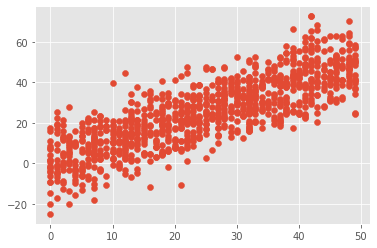

In [9]:
import matplotlib.pyplot as plt
plt.matplotlib.style.use('ggplot')
plt.scatter(x, y)
plt.show()

## 2. -ve correlation

In [10]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

In [11]:
x[:10]

array([33, 47, 39, 34,  5, 20, 35, 38, 49, 17])

In [12]:
# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

In [13]:
y[:10]

array([56.13938645, 53.95193619, 53.97386228, 67.84930237, 93.69109152,
       75.83643244, 57.23108695, 58.58576078, 52.5531191 , 82.37276403])

In [14]:
np.corrcoef(x, y)

array([[ 1.        , -0.94957116],
       [-0.94957116,  1.        ]])

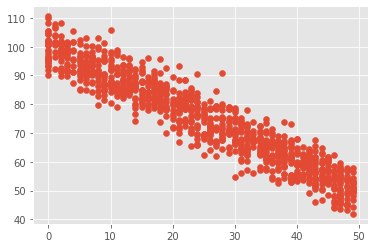

In [15]:
plt.scatter(x, y)
plt.show()

## 3. No Correlation

In [16]:
x = np.random.randint(0, 50, 1000)

In [17]:
x[:10]

array([48, 38, 40, 22,  0, 20, 23,  3,  5,  2])

In [18]:
y = np.random.randint(0, 50, 1000)

In [19]:
y[:10]

array([24, 12, 17, 36, 38, 41, 15, 21, 25, 19])

In [20]:
np.corrcoef(x, y)

array([[ 1.        , -0.00554681],
       [-0.00554681,  1.        ]])

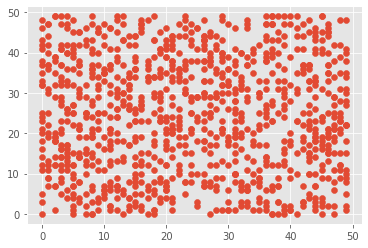

In [21]:
plt.scatter(x,y)
plt.show()

## 4. Correlation Matrix

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

In [4]:
df[:10]

,a,b,c,d
0,13,15.217970,92.031532,23
1,39,32.984950,56.471120,13
2,41,27.961282,57.124492,26
3,41,32.181462,52.620208,42
4,10,6.063029,90.506146,5
5,28,28.247408,70.233410,15
6,33,35.014550,62.530790,41
7,16,18.157442,93.122290,41
8,49,44.903705,47.701194,3
9,5,2.076935,92.626321,33


In [5]:
df.corr()

,a,b,c,d
a,1.000000,0.817093,-0.945058,0.016793
b,0.817093,1.000000,-0.760865,0.034696
c,-0.945058,-0.760865,1.000000,-0.023567
d,0.016793,0.034696,-0.023567,1.000000


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


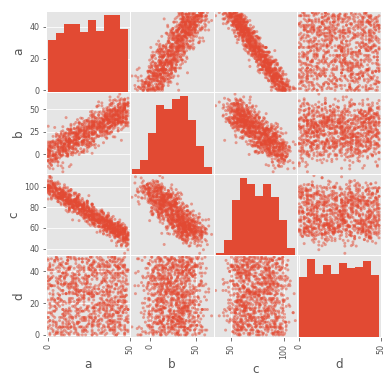

In [31]:
pd.scatter_matrix(df, figsize=(6, 6))
plt.show()

## 5. correlation matrix plot

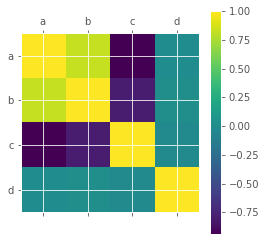

In [32]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## 6. Explore around Spurious/fake correlation
- Can I believe blindly correlation value or we need to use bit common sense??
- [refer](http://www.tylervigen.com/spurious-correlations)


## 7.Auto correlation

In [22]:
import os 
os.chdir("C:\\Users\\ramreddymyla\\Google Drive\\01 DS ML DL NLP and AI With Python Lab Copy\\02 Lab Data\\Python")

In [24]:
import pandas as pd 
# Load Microsoft stock data
df = pd.read_csv("MSFT.csv",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 8/6/2012 to 8/4/2017
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7+ KB


In [25]:
# Convert the date index to datetime
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-08-06 to 2017-08-04
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7 KB


In [26]:
# Convert the daily data to weekly data
df = df.resample(rule='W', how='last')
df.head()

C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091


In [27]:
# Compute the percentage change of prices
returns = df.pct_change()

In [28]:
returns.head()

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218


In [29]:
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16
